In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sn
import scipy

pd.set_option("display.precision", 2)

# Load dataset
df = pd.read_csv("second_data.csv", index_col=False, header=0)

print(df.head())

   life_quality     PPI  health_care  cost_of_living  property_income  \
0        196.51  117.91        75.94          135.49             8.01   
1        187.38   85.29        73.04           82.62             6.42   
2        185.80   87.36        78.94           71.31            13.12   
3        184.04  109.73        73.08          131.75             9.45   
4        183.31   86.50        75.77          104.07             7.55   

   pollution   tree  
0      17.31  53.61  
1      22.55  27.60  
2      17.76  33.77  
3      26.44  33.85  
4      20.97  59.21  


In [17]:
# Normalize
v_norm = ["tree","pollution","life_quality","cost_of_living","PPI","health_care","property_income"]

#0-1 Normalization
df[v_norm] = (df[v_norm] - np.min(df[v_norm])) / (np.max(df[v_norm]) - np.min(df[v_norm]))

print(df.head())

   life_quality   PPI  health_care  cost_of_living  property_income  \
0          1.00  1.00         0.74            1.00             0.22   
1          0.91  0.64         0.66            0.46             0.13   
2          0.90  0.66         0.82            0.35             0.53   
3          0.88  0.91         0.66            0.96             0.31   
4          0.88  0.65         0.73            0.68             0.20   

   pollution  tree  
0       0.05  0.74  
1       0.12  0.37  
2       0.06  0.46  
3       0.18  0.46  
4       0.10  0.82  


In [18]:
model = smf.ols("tree ~ pollution + life_quality + cost_of_living + PPI + health_care", data=df)
m = model.fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   tree   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.346
Date:                Tue, 21 Jun 2022   Prob (F-statistic):              0.255
Time:                        22:53:58   Log-Likelihood:                 21.816
No. Observations:                  78   AIC:                            -31.63
Df Residuals:                      72   BIC:                            -17.49
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6295      0.254      2.

                            OLS Regression Results                            
Dep. Variable:              pollution   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.020
Date:                Tue, 21 Jun 2022   Prob (F-statistic):             0.0164
Time:                        22:54:03   Log-Likelihood:                 4.0489
No. Observations:                  78   AIC:                            -4.098
Df Residuals:                      76   BIC:                            0.6156
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5396      0.059      9.070      0.0

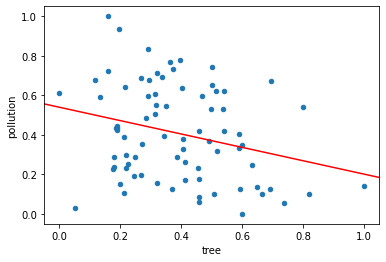

In [19]:
# Plot data and regression line
model2 = smf.ols("pollution ~ tree", data=df)
m2 = model2.fit()
print(m2.summary())

fig = df.plot.scatter(x="tree", y="pollution");
sm.graphics.abline_plot(model_results=m2, ax=fig.axes, c="red");
plt.show()

In [20]:
p = df["pollution"]
t = df["tree"]
print(scipy.stats.pearsonr(p, t))

(-0.27090920229416304, 0.016438853957380668)


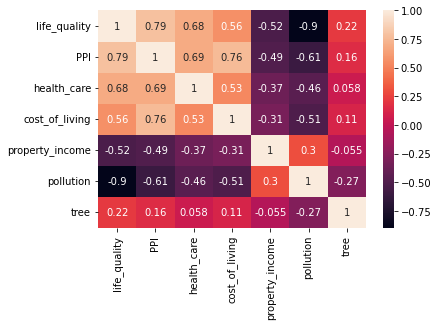

In [21]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()